In [33]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

dt = pd.read_csv('retail_raw_reduced.csv')
dt.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [34]:
dt.isnull().sum()

order_id       0
order_date     0
customer_id    0
city           0
province       0
product_id     0
brand          0
quantity       0
item_price     0
dtype: int64

In [35]:
dt['month'] = dt['order_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
dt.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


In [36]:
top5_brand = dt.groupby(['brand'])['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)[:5]
top5_brand.head()

,brand,quantity
6,BRAND_P,10130
8,BRAND_S,9645
0,BRAND_A,5752
9,BRAND_W,5609
2,BRAND_C,5366


In [37]:
top_brand_nop = dt[(dt['month'] == '2019-11') & (dt['brand'].isin(top5_brand['brand'].to_list()))]
top_brand_nop.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,month
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
6,1711399,2019-11-04,16791,Jakarta Barat,DKI Jakarta,P0860,BRAND_C,1,1465000,2019-11
29,1719550,2019-11-22,15028,Jakarta Selatan,DKI Jakarta,P3194,BRAND_S,18,1150000,2019-11
36,1715014,2019-11-12,16940,Jakarta Timur,DKI Jakarta,P4064,BRAND_W,4,303000,2019-11
43,1716136,2019-11-14,14527,Depok,Jawa Barat,P2598,BRAND_P,3,695000,2019-11


In [38]:
top_brand_nop_perproduct = top_brand_nop.groupby(['brand', 'product_id'])['quantity'].sum().reset_index()
top_brand_nop_perproduct

,brand,product_id,quantity
0,BRAND_A,P0003,2
1,BRAND_A,P0029,14
2,BRAND_A,P0030,1
3,BRAND_A,P0032,1
4,BRAND_A,P0035,1
...,...,...,...
364,BRAND_W,P4125,25
365,BRAND_W,P4134,25
366,BRAND_W,P4137,25
367,BRAND_W,P4141,25


In [39]:
top_brand_nop_perproduct['quantity_group'] = top_brand_nop_perproduct['quantity'].apply(lambda x: '>100' if x >= 100 else '<=100')
top_brand_nop_perproduct.sort_values('quantity', ascending=False, inplace=True)
top_brand_nop_perproduct

,brand,product_id,quantity,quantity_group
138,BRAND_P,P2445,504,>100
154,BRAND_P,P2509,384,>100
360,BRAND_W,P4100,384,>100
277,BRAND_S,P3364,360,>100
105,BRAND_C,P0830,288,>100
...,...,...,...,...
79,BRAND_C,P0740,1,<=100
78,BRAND_C,P0737,1,<=100
218,BRAND_S,P3187,1,<=100
75,BRAND_C,P0730,1,<=100


In [40]:
s_sort = top_brand_nop_perproduct.groupby(['brand'])['product_id'].nunique().sort_values(ascending=False)
s_sort

brand
BRAND_S    118
BRAND_P     83
BRAND_C     65
BRAND_A     60
BRAND_W     43
Name: product_id, dtype: int64

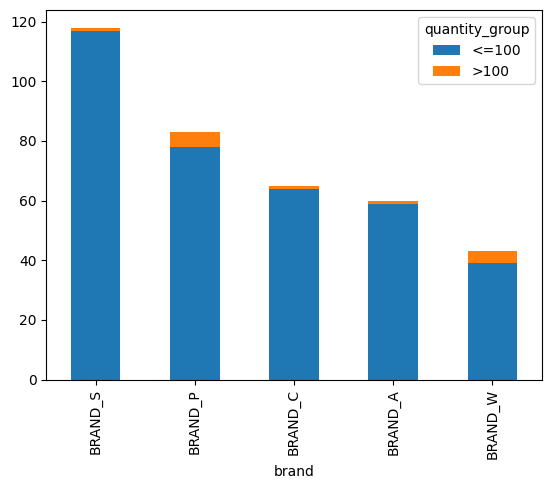

In [41]:
top_brand_nop_perproduct.groupby(['brand', 'quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.show()

In [42]:
dt.describe()

,order_id,customer_id,quantity,item_price
count,5.000000e+03,5000.000000,5000.000000,5.000000e+03
mean,1.707214e+06,15474.832600,11.407200,9.345866e+05
std,2.152582e+04,1650.211651,29.404536,1.031427e+06
min,1.666774e+06,12391.000000,1.000000,2.600000e+04
25%,1.688852e+06,14096.000000,2.000000,4.500000e+05
50%,1.708448e+06,15492.500000,5.000000,6.040000e+05
75%,1.725623e+06,16916.000000,12.000000,1.045000e+06
max,1.742998e+06,18287.000000,720.000000,2.976200e+07


In [43]:
scaler = MinMaxScaler()
scaling_column = ['order_id', 'customer_id', 'quantity', 'item_price']
dt[scaling_column] = scaler.fit_transform(dt[scaling_column])
dt[scaling_column].describe().T[['min', 'max']]

,min,max
order_id,0.0,1.0
customer_id,0.0,1.0
quantity,0.0,1.0
item_price,0.0,1.0


In [44]:
dt.corr()

/var/folders/br/1_hw2f3s3mxdt24ppv8j3vq00000gn/T/ipykernel_4632/1921767823.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dt.corr()


,order_id,customer_id,quantity,item_price
order_id,1.000000,-0.009770,-0.038307,-0.036724
customer_id,-0.009770,1.000000,-0.018714,-0.014067
quantity,-0.038307,-0.018714,1.000000,-0.134096
item_price,-0.036724,-0.014067,-0.134096,1.000000
